In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

# Dataset

In [98]:
df_employee.loc[635:650,"annual_salary"] = np.nan

In [2]:
df_employee = pd.read_csv('./datasets/employee_data.csv')
df_employee.loc[635:650,"annual_salary"] = np.nan
df_employee

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
...,...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0,NaN
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0,NaN
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0,NaN
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0,NaN


# Exploración del Dataset

In [3]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             1000 non-null   int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             793 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      983 non-null    float64
 7   tax_file_no        0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
df_employee.isnull().sum()

number                  0
first_name              1
last_name               1
gender                207
birth_date              1
employment_status     189
annual_salary          17
tax_file_no          1000
dtype: int64

## Porcentaje de datos nulos

In [5]:
rows, columns = df_employee.shape
print(rows, columns)

1000 8


In [6]:
cell_count = rows * columns
print(cell_count)

8000


In [7]:
number_of_nulls = df_employee.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 17.7%


## Eliminar columnas

Las columnas que sean irrelevantes desde el punto de vista del contexto, o que tengan demasiado valores nulos y no puedan ser "imputados" se deben remover de los datos

In [8]:
df_employee.dropna(axis="columns", how="all")

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0
...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0


In [9]:
df_employee.drop(labels=["tax_file_no"], axis="columns")

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0
...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0


In [10]:
df_employee.drop(labels=["tax_file_no"], axis="columns", inplace=True)

In [11]:
df_employee.head()

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0


In [12]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             1000 non-null   int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             793 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      983 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


## Remover renglones

Podemos remover renglones que tengan cierta cantidad datos nulos.

In [13]:
df_employee.dropna(axis='index', thresh=2, inplace=False)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0
...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0


In [14]:
df_employee.dropna(axis='index', thresh=2, inplace=True)

## Reemplazar valores nulos

Para eso hay diversas técnicas y dependerá tanto del contexto como del tipo de dato que estemos analizando,

In [15]:
def plot_frecuency_distribution(category, df):
    cat_count = df[category].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {category.capitalize()}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(category.capitalize(), fontsize=12)
    plt.show()

In [16]:
def plot_pie_chart(category, df):
    labels = df[category].astype('category').cat.categories.tolist()
    counts = df[category].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.show()

### Columna Gender

C:\Users\David.Piedrahita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


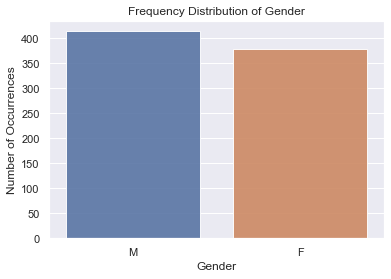

In [17]:
plot_frecuency_distribution("gender", df_employee)

#### corregir utilizando la función fillna de pandas

In [18]:
df_employee.gender.fillna("U")

0      M
1      F
2      M
3      M
4      M
      ..
995    U
996    M
997    M
998    F
999    M
Name: gender, Length: 999, dtype: object

#### Aplicar una función personalizada

In [19]:
df_employee[df_employee.gender.isna()]

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
5,264,Jaeda,Effertz,NaN,1994-03-21,PE,131924.0
15,194,Ace,Upton,NaN,1987-08-25,PE,120120.0
17,901,Nikki,D'Amore,NaN,1985-08-09,CA,108287.0
21,431,Maynard,Zieme,NaN,1982-10-12,PE,76354.0
39,982,Riley,Orn,NaN,1978-01-09,PE,82041.0
...,...,...,...,...,...,...,...
979,544,Henrietta,Greenholt,NaN,1977-04-06,PE,93206.0
985,819,Jed,Casper,NaN,1998-04-21,CA,98343.0
986,137,Rosco,Lynch,NaN,1989-06-20,PE,103499.0
990,916,Jerrad,Orn,NaN,1976-12-15,PE,142640.0


In [20]:
def clasificar_genero_por_nomber(nombre:str, gender):    
    if not pd.isna(gender):
        return gender
    if nombre.endswith("o") or nombre.endswith("r") or nombre.endswith("r"):
        return "M"
    
    else:
        return "F"

In [21]:
df_employee["gender"] = df_employee.apply(lambda row: clasificar_genero_por_nomber(row["first_name"], row["gender"]), axis=1)

In [22]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             999 non-null    int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             999 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      983 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 62.4+ KB


### Employment status

In [23]:
df_employee.groupby("employment_status").size()

employment_status
CA    109
PE    599
TE    103
dtype: int64

C:\Users\David.Piedrahita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


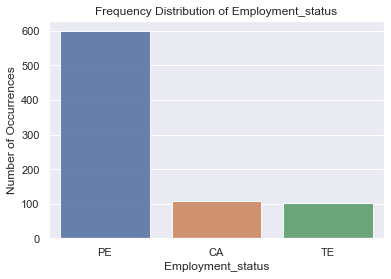

In [24]:
plot_frecuency_distribution("employment_status", df_employee)

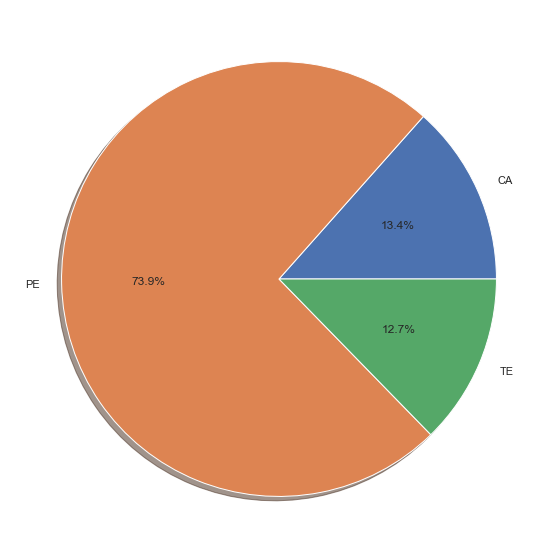

In [25]:
plot_pie_chart("employment_status", df_employee)

In [26]:
df_employee["employment_status"] = df_employee.employment_status.fillna("PE")

In [27]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             999 non-null    int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             999 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  999 non-null    object 
 6   annual_salary      983 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 62.4+ KB


## annual_salary

In [28]:
salario_promedio = df_employee.annual_salary.mean()
salario_promedio

102059.88708036623

In [29]:
df_employee["annual_salary_fill_mean"] = df_employee.annual_salary.fillna(salario_promedio)

In [30]:
df_employee["annual_salary_fill_mean"].mean()

102059.88708036618

In [31]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number                   999 non-null    int64  
 1   first_name               999 non-null    object 
 2   last_name                999 non-null    object 
 3   gender                   999 non-null    object 
 4   birth_date               999 non-null    object 
 5   employment_status        999 non-null    object 
 6   annual_salary            983 non-null    float64
 7   annual_salary_fill_mean  999 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.2+ KB


In [32]:
df_salary_by_employment_satus = df_employee.groupby("employment_status").agg({"annual_salary":"mean"})
df_salary_by_employment_satus

,annual_salary
employment_status,
CA,109192.419048
PE,100797.375804
TE,104357.465347


In [33]:
df_salary_by_employment_satus.loc["CA", "annual_salary"]

109192.41904761904

In [34]:
def fill_salary_by_status(row, df_salary_by_employment_satus):
    salary, emp_status = row["annual_salary"], row["employment_status"]
    if not pd.isna(salary):
        return salary
    
    return df_salary_by_employment_satus.loc[emp_status, "annual_salary"]

In [35]:
df_employee.apply(fill_salary_by_status, axis=1, args=( df_salary_by_employment_satus,))

0       64598.0
1      124103.0
2      100324.0
3      144957.0
4      137659.0
         ...   
995     66592.0
996    127966.0
997     60712.0
998    103606.0
999    127405.0
Length: 999, dtype: float64

In [36]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number                   999 non-null    int64  
 1   first_name               999 non-null    object 
 2   last_name                999 non-null    object 
 3   gender                   999 non-null    object 
 4   birth_date               999 non-null    object 
 5   employment_status        999 non-null    object 
 6   annual_salary            983 non-null    float64
 7   annual_salary_fill_mean  999 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.2+ KB


# Manipular Strings

In [37]:
ciudades = np.random.choice(["Medellín", "medellin", "Medellin", "mede"], size=999)

In [38]:
df_employee["ciudad"] = ciudades

In [39]:
df_employee.ciudad.str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8").str.upper().unique()

array(['MEDELLIN', 'MEDE'], dtype=object)

In [40]:
#df_employee.last_name.str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8").str.upper()

In [41]:
df_employee["nombre_completo"] = df_employee.first_name + " " + df_employee.last_name

In [42]:
df_employee["nombre_completo"]

0           Lenord Kihn
1          Palma Beahan
2         Hebert Muller
3      Virginia Ullrich
4           Roby Hudson
             ...       
995         Dann Crooks
996           Maxim Orn
997     Kimberli Walter
998     Talmage Bartell
999       Laurie Nienow
Name: nombre_completo, Length: 999, dtype: object

In [43]:
df_employee[["nombre", "apellido"]] = df_employee["nombre_completo"].str.split(expand=True)

In [44]:
df_employee

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,annual_salary_fill_mean,ciudad,nombre_completo,nombre,apellido
0,483,Lenord,Kihn,M,1994-07-01,PE,64598.0,64598.0,Medellin,Lenord Kihn,Lenord,Kihn
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,124103.0,Medellín,Palma Beahan,Palma,Beahan
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,100324.0,Medellín,Hebert Muller,Hebert,Muller
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,144957.0,mede,Virginia Ullrich,Virginia,Ullrich
4,937,Roby,Hudson,M,1997-01-15,PE,137659.0,137659.0,Medellín,Roby Hudson,Roby,Hudson
...,...,...,...,...,...,...,...,...,...,...,...,...
995,712,Dann,Crooks,F,1983-12-25,CA,66592.0,66592.0,Medellin,Dann Crooks,Dann,Crooks
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0,127966.0,medellin,Maxim Orn,Maxim,Orn
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0,60712.0,Medellín,Kimberli Walter,Kimberli,Walter
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0,103606.0,medellin,Talmage Bartell,Talmage,Bartell


# Manipular Fechas

In [45]:
df_employee.dtypes

number                       int64
first_name                  object
last_name                   object
gender                      object
birth_date                  object
employment_status           object
annual_salary              float64
annual_salary_fill_mean    float64
ciudad                      object
nombre_completo             object
nombre                      object
apellido                    object
dtype: object

In [46]:
df_employee["birth_date"].dtype

dtype('O')

In [47]:
df_employee["birth_date"] = pd.to_datetime(df_employee["birth_date"])

In [48]:
df_employee.dtypes

number                              int64
first_name                         object
last_name                          object
gender                             object
birth_date                 datetime64[ns]
employment_status                  object
annual_salary                     float64
annual_salary_fill_mean           float64
ciudad                             object
nombre_completo                    object
nombre                             object
apellido                           object
dtype: object

In [49]:
from datetime import datetime

In [50]:
current_date = datetime.today()

In [51]:
# df_employee["edad_actual"] = (current_date - df_employee.birth_date).days

In [52]:
df_employee["edad_actual"] = (current_date - df_employee.birth_date).dt.days

In [53]:
df_employee["edad_actual"]

0      10024
1      18115
2      11420
3      11036
4       9095
       ...  
995    13865
996    18547
997    16714
998    11982
999    10480
Name: edad_actual, Length: 999, dtype: int64

In [54]:
ann = [15] + list(range(20, 30))*10 + [75]

In [55]:
years_choices = np.random.choice(ann, size=1000)
years = [timedelta(days=365*int(x)) for x in years_choices]

In [56]:
df_employee["entry_date"] = pd.to_datetime(df_employee.birth_date) + pd.Series(years)

In [57]:
df_employee["entry_date"] = df_employee["entry_date"].apply(lambda x: x if x<=date(2020,12,31) else date(2020,12,31))

C:\Users\DAVID~1.PIE\AppData\Local\Temp/ipykernel_10052/3711058530.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_employee["entry_date"] = df_employee["entry_date"].apply(lambda x: x if x<=date(2020,12,31) else date(2020,12,31))


In [58]:
df_employee["entry_date"] = pd.to_datetime(df_employee["entry_date"])
df_employee["birth_date"] = pd.to_datetime(df_employee["birth_date"])

In [59]:
df_employee["edad_entrada"]=(df_employee.entry_date - df_employee.birth_date).dt.days/365.4

In [60]:
df_employee[df_employee["edad_entrada"]<18]

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,annual_salary_fill_mean,ciudad,nombre_completo,nombre,apellido,edad_actual,entry_date,edad_entrada
47,969,Marget,West,M,1979-10-11,PE,79230.0,79230.0,medellin,Marget West,Marget,West,15401,1994-10-07,14.98358
197,135,Aletha,Konopelski,F,1984-01-18,PE,60778.0,60778.0,medellin,Aletha Konopelski,Aletha,Konopelski,13841,1999-01-14,14.98358
283,31,Teddy,Rath,M,1990-02-17,PE,109005.0,109005.0,mede,Teddy Rath,Teddy,Rath,11619,2005-02-13,14.98358
296,214,Gail,Erdman,F,1975-10-23,PE,84614.0,84614.0,Medellin,Gail Erdman,Gail,Erdman,16850,1990-10-19,14.98358
308,486,Kelby,Hessel,M,1972-06-21,PE,103945.0,103945.0,Medellín,Kelby Hessel,Kelby,Hessel,18069,1987-06-18,14.98358
371,101,Khalilah,Flatley,M,1974-03-31,PE,91171.0,91171.0,Medellín,Khalilah Flatley,Khalilah,Flatley,17421,1989-03-27,14.98358
476,515,Adelard,Abshire,F,1973-12-15,PE,66031.0,66031.0,medellin,Adelard Abshire,Adelard,Abshire,17527,1988-12-11,14.98358
528,302,Vernell,Schmidt,F,1983-08-08,PE,123021.0,123021.0,medellin,Vernell Schmidt,Vernell,Schmidt,14004,1998-08-04,14.98358
581,37,Jolette,Marks,M,1977-10-12,PE,132173.0,132173.0,Medellín,Jolette Marks,Jolette,Marks,16130,1992-10-08,14.98358
820,517,Ashley,Emard,F,1971-01-09,PE,149670.0,149670.0,medellin,Ashley Emard,Ashley,Emard,18598,1986-01-05,14.98358


# Data Set de Aviones

In [61]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


# Exploración del dataset

In [62]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


# Visualización de variables categóricas

In [63]:
df_flights.carrier.unique()

array(['AS', 'US', 'UA', 'DL', 'AA', 'F9', 'VX', 'OO', 'WN', 'B6', 'HA'],
      dtype=object)

## Box Plot

<AxesSubplot:title={'center':'dep_time'}, xlabel='origin'>

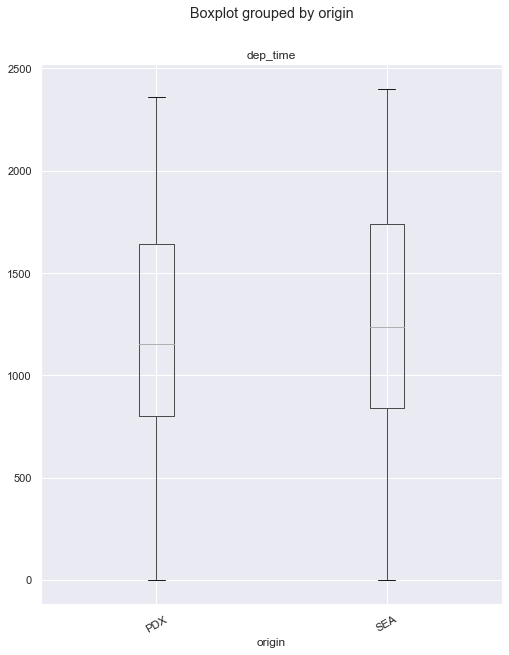

In [64]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(8,10))

<AxesSubplot:title={'center':'dep_time'}, xlabel='carrier'>

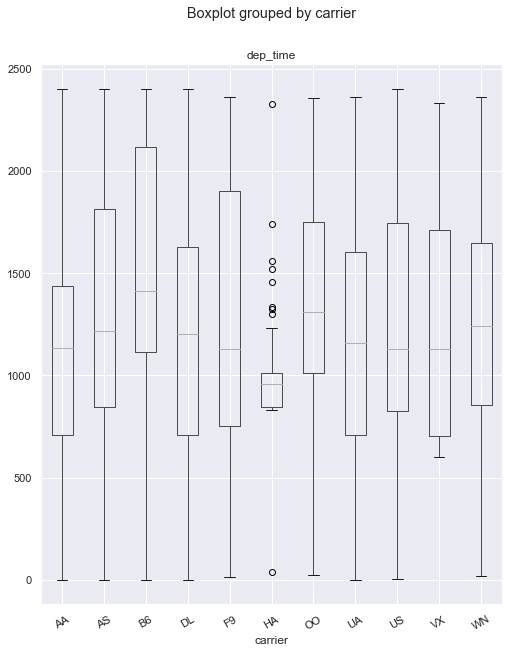

In [65]:
df_flights.boxplot('dep_time','carrier',rot = 30,figsize=(8,10))

## Frecuencias de Distribución

Esto nos permite el número de ocurrencias de cada categoría de una variable.

In [66]:
df_flights.groupby("carrier").size().sort_values(ascending=False)

carrier
AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
dtype: int64

In [67]:
def plot_frecuency_distribution(category, df):
    cat_count = df[category].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {category.capitalize()}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(category.capitalize(), fontsize=12)
    plt.show()


C:\Users\David.Piedrahita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


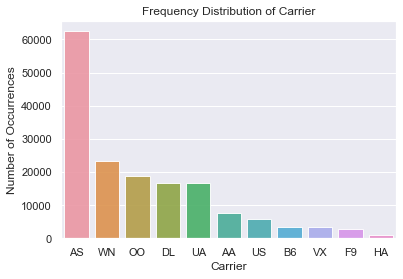

In [68]:
plot_frecuency_distribution("carrier", df_flights)

## Pie Chart

In [69]:
def plot_pie_chart(category, df):
    labels = df[category].astype('category').cat.categories.tolist()
    counts = df[category].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.show()

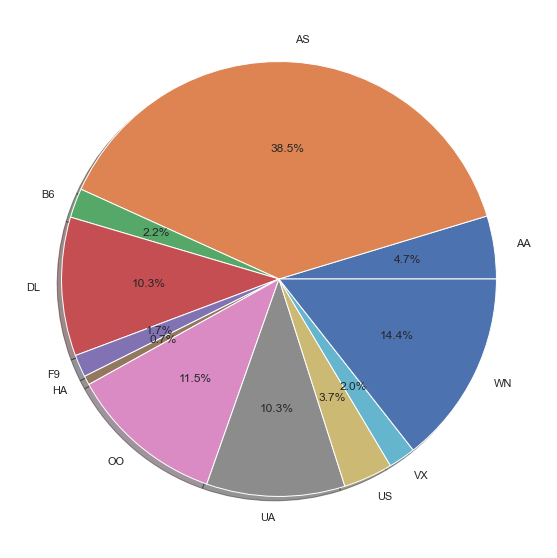

In [70]:
plot_pie_chart("carrier", df_flights)

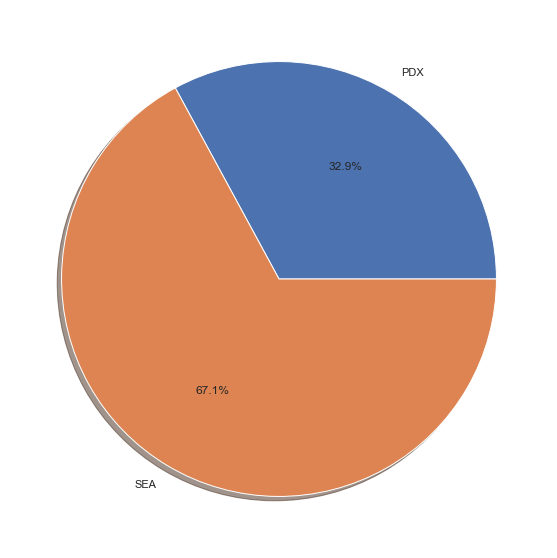

In [71]:
plot_pie_chart("origin", df_flights)

# Seleccionar las variables categóricas

A continuación vemos que las posibles variables categóricas son las que son de tipo "object". Las demás son numéricas.

In [72]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


## Dataframe de solo variables categóricas

In [73]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

## Detección e imputación de valores nulos

In [74]:
print(cat_df_flights.isnull().values.sum())

248


## Valores nulos por variable

In [75]:
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


En este caso vemos que todos los valores nulos pertencen a la variable *tailnum*

### Imputación

Esto es un proceso que consiste en llenar los valores faltantes mediante algún método "razonable".
Para variables numéricas una de las técnicas es utilizar un estadístico como el promedio o la mediana. Para nuestro caso de variables categóricas vamos a reemplazar los valores nulos con el valor más común, en estadística es llamado la "moda".


In [76]:
modal_tailnum = cat_df_flights['tailnum'].value_counts().index[0]
print(modal_tailnum)

N223AG


In [77]:
cat_df_flights = cat_df_flights.fillna(modal_tailnum)

Verifiquemos que en efecto ya no tenemos valores nulos

In [78]:
print(cat_df_flights.isnull().values.sum())

0


## One-Hot-Encoding

Si bien esta técnica resuelve el problema de tener pesos desiguales, sin embargo, esto no será muy útil cuando se tienen muchas categorías ya que esto agregaría demasiadas columnas y podríamos caer en la [maldición de la dimensionalidad (Curse of dimensionality)](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

## Utilizando Pandas

Utilizamos la función *get_dummies*

In [79]:
cat_df_flights

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC
...,...,...,...,...
162044,UA,N477UA,PDX,IAH
162045,DL,N137DL,SEA,ATL
162046,AS,N530AS,SEA,SAN
162047,US,N223AG,PDX,PHX


In [80]:
cat_df_flights_onehot = pd.get_dummies(
    cat_df_flights, columns=["origin", "carrier"], prefix = ["origin", "carrier"])


In [81]:
cat_df_flights_onehot

,tailnum,dest,origin_PDX,origin_SEA,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,ANC,1,0,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,CLT,0,1,0,0,0,0,0,0,0,0,1,0,0
2,N37422,IAH,1,0,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,CLT,1,0,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,ANC,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162044,N477UA,IAH,1,0,0,0,0,0,0,0,0,1,0,0,0
162045,N137DL,ATL,0,1,0,0,0,1,0,0,0,0,0,0,0
162046,N530AS,SAN,0,1,0,1,0,0,0,0,0,0,0,0,0
162047,N223AG,PHX,1,0,0,0,0,0,0,0,0,0,1,0,0


### Utilizando sickit-learn

In [82]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

In [83]:
from sklearn.preprocessing import LabelBinarizer

In [84]:
ohe =  LabelBinarizer()
ohe_results = ohe.fit_transform(cat_df_flights_onehot_sklearn['carrier'])

In [85]:
ohe_results

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [86]:
ohe.classes_

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN'],
      dtype='<U2')

In [87]:
ohe_results_df = pd.DataFrame(ohe_results, columns=ohe.classes_)
ohe_results_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [88]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, ohe_results_df], axis=1)

In [89]:
result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


## Target Encoding

Supongamos que la variable "*dep_time*" es nuestra variable objetivo (target).

In [90]:
cat_df_flights_target_encoding = cat_df_flights.copy()
cat_df_flights_target_encoding["target"] = df_flights["dep_time"]
cat_df_flights_target_encoding.head()

,carrier,tailnum,origin,dest,target
0,AS,N508AS,PDX,ANC,1.0
1,US,N195UW,SEA,CLT,4.0
2,UA,N37422,PDX,IAH,8.0
3,US,N547UW,PDX,CLT,28.0
4,AS,N762AS,SEA,ANC,34.0


In [91]:
cat_df_flights_target_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carrier  162049 non-null  object 
 1   tailnum  162049 non-null  object 
 2   origin   162049 non-null  object 
 3   dest     162049 non-null  object 
 4   target   161192 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [92]:
na_fill_values = cat_df_flights_target_encoding.target.mean()
cat_df_flights_target_encoding.fillna(na_fill_values, inplace=True)

In [93]:
cat_df_flights_target_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carrier  162049 non-null  object 
 1   tailnum  162049 non-null  object 
 2   origin   162049 non-null  object 
 3   dest     162049 non-null  object 
 4   target   162049 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [94]:
encodings = cat_df_flights_target_encoding.groupby("carrier").agg({"target":"mean"}).reset_index()

In [95]:
encodings

,carrier,target
0,AA,1139.753005
1,AS,1305.577368
2,B6,1505.048686
3,DL,1215.535727
4,F9,1246.846017
5,HA,950.421264
6,OO,1353.848156
7,UA,1218.665926
8,US,1247.354458
9,VX,1247.787108


In [96]:
cat_df_flights_target_encoding = cat_df_flights_target_encoding.merge(encodings, how="left", on="carrier", suffixes=("", "carrier_mean"))

In [97]:
cat_df_flights_target_encoding.head()

,carrier,tailnum,origin,dest,target,targetcarrier_mean
0,AS,N508AS,PDX,ANC,1.0,1305.577368
1,US,N195UW,SEA,CLT,4.0,1247.354458
2,UA,N37422,PDX,IAH,8.0,1218.665926
3,US,N547UW,PDX,CLT,28.0,1247.354458
4,AS,N762AS,SEA,ANC,34.0,1305.577368


# Ejercicio

Hacer análisis de Variables del sigueiente DataSet

[Ejercicio de Kaggle](https://www.kaggle.com/deepankurk/flight-take-off-data-jfk-airport)